In [7]:
import train
import dataset
from dataset import XRayDataset, HardAugmentation, BaseAugmentation
import visualization
import numpy as np
import albumentations as A

In [8]:
# 시각화를 위한 팔레트를 설정합니다.
PALETTE = visualization.palette()
CLASSES = dataset.classes()

CLASS2IND = {v: i for i, v in enumerate(CLASSES)}
IND2CLASS = {v: k for k, v in CLASS2IND.items()}

IMAGE_ROOT = 'train/DCM'
LABEL_ROOT = 'train/outputs_json'

# 시각화 함수입니다. 클래스가 2개 이상인 픽셀을 고려하지는 않습니다.
def label2rgb(label):
    image_size = label.shape[1:] + (3, )
    image = np.zeros(image_size, dtype=np.uint8)
    
    for i, class_label in enumerate(label):
        image[class_label == 1] = PALETTE[i]
        
    return image

# transfoms 확인하기
tf 변수에 transforms를 할당하고 transforms된 이미지 확인

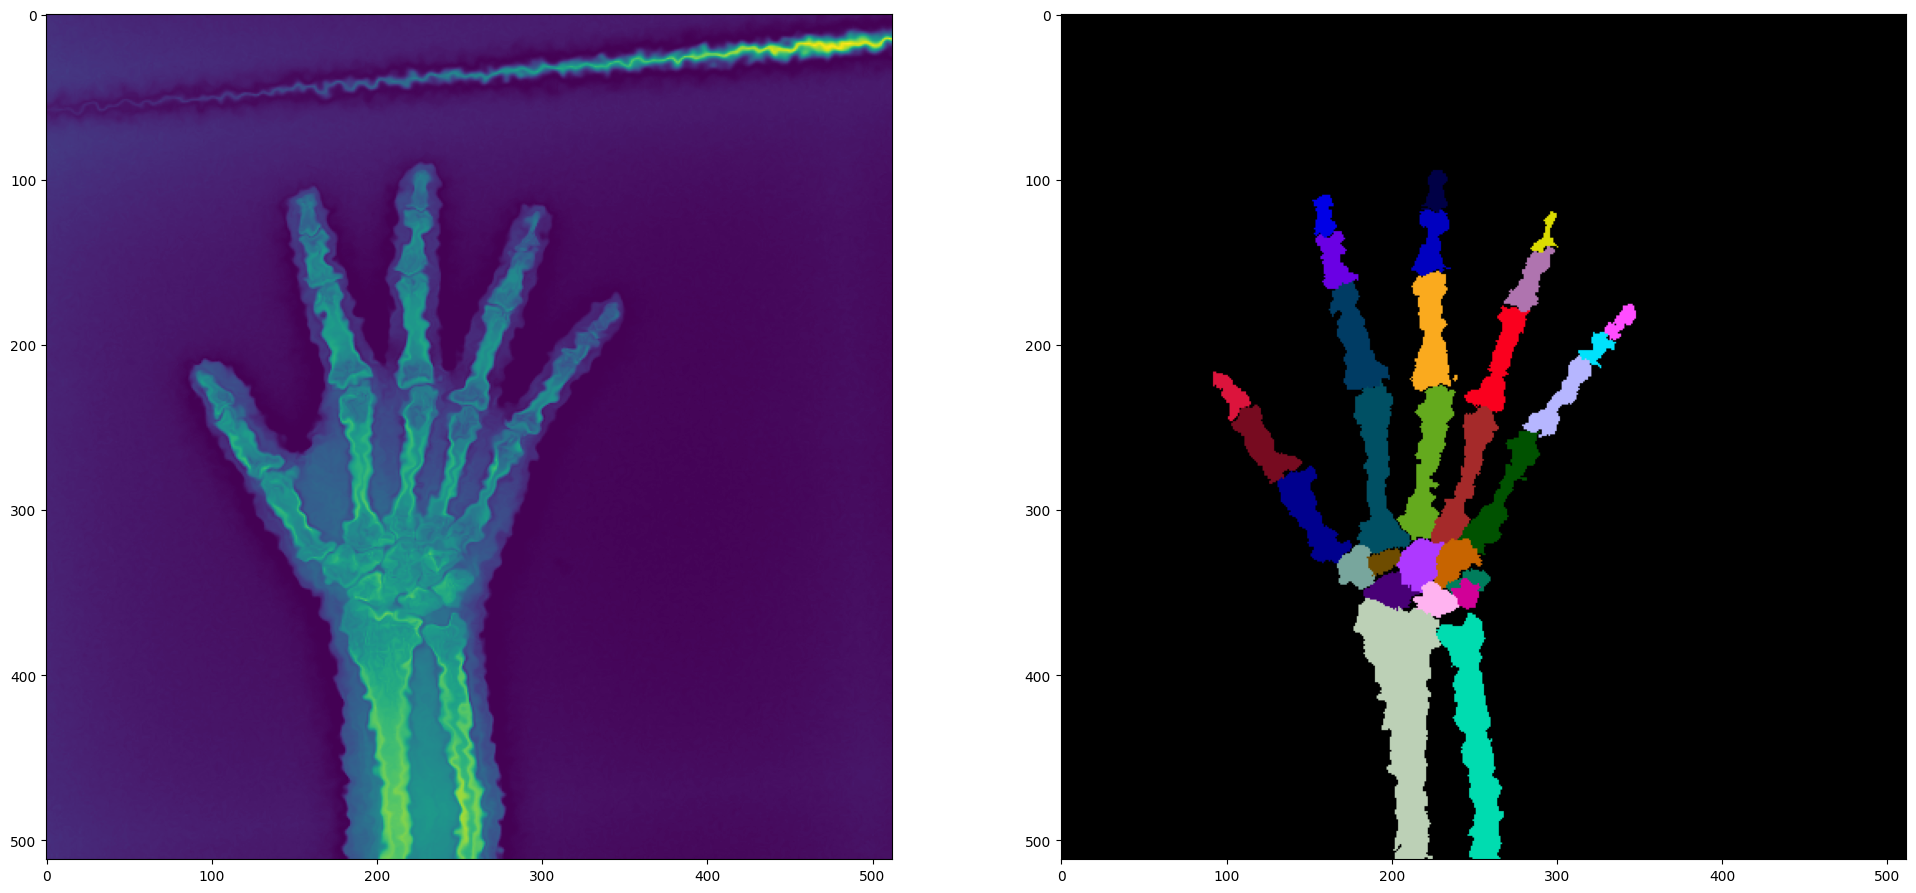

In [27]:
tf = A.Compose([
                    A.Resize(1024, 1024),
					A.RandomBrightnessContrast(brightness_limit=(-0.8, 0.9), contrast_limit=(-0.9, 0.1), p=1),
					A.RandomResizedCrop(512, 512, scale=(0.5, 1.0), ratio=(1.0, 1.0), always_apply=False, p=1.0),
					A.ElasticTransform(alpha=15.0, sigma=2.0),
					A.OneOf([A.Blur(blur_limit=2, p=1.0), A.MedianBlur(blur_limit=3, p=1.0)], p=0.2),
					A.HorizontalFlip(p=0.5),
                ])
# tf = HardAugmentation(img_size=512, is_train=True).transforms

train.transforms_validation(IMAGE_ROOT, LABEL_ROOT, tf=tf)

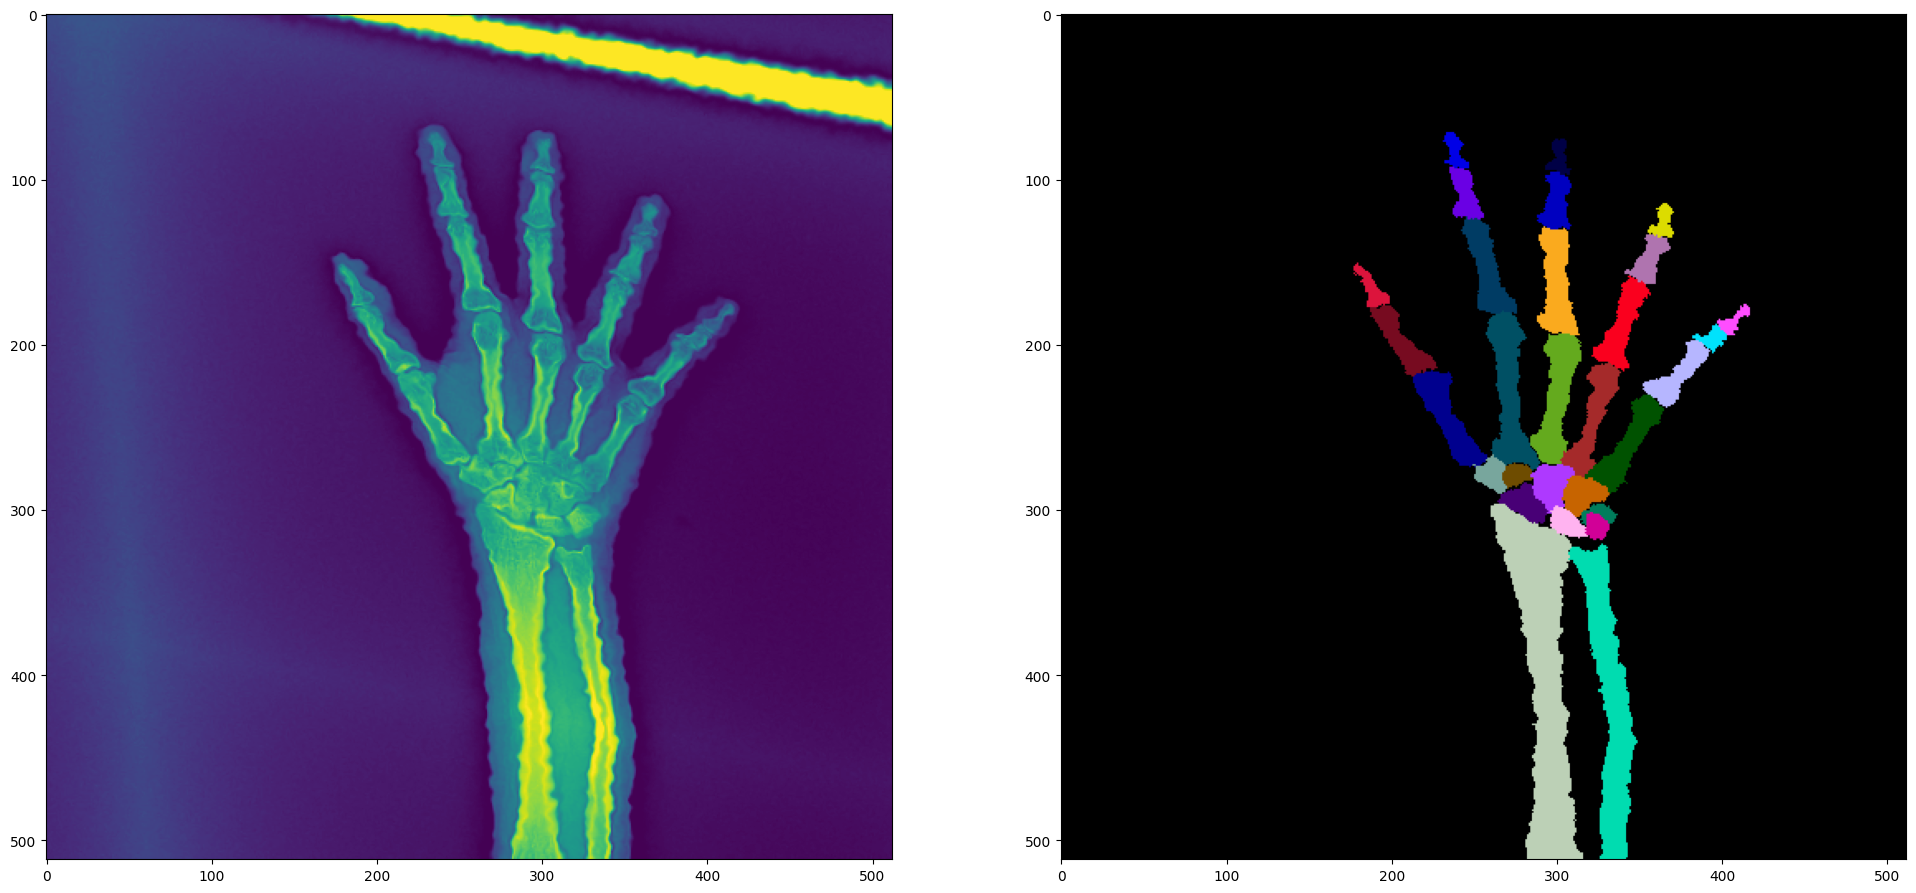

In [36]:

tf = A.Compose([
                    A.Resize(512, 512),
                    A.ElasticTransform(alpha=9.0, sigma=2.0),
                    A.OneOf([A.Blur(blur_limit=2, p=1.0), A.MedianBlur(blur_limit=3, p=1.0)], p=0.2),
                    A.HorizontalFlip(p=0.5),
                    A.RandomBrightnessContrast(brightness_limit=0, contrast_limit=(-1, 1), p=0.7),
                ])

train.transforms_validation(IMAGE_ROOT, LABEL_ROOT, tf=tf)